In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
from scipy.stats import gaussian_kde
from sklearn.preprocessing import PowerTransformer, QuantileTransformer, StandardScaler

# 1.Load data

In [28]:
deletionlibrary_phenotype = pd.read_excel("../resources/Hayles_2013_OB_merged_categories_sysIDupdated.xlsx")
manual_clusters = pd.read_excel("../resources/20250317_plateau_GWMs.xlsx", index_col=0)["cluster_order"].to_dict()

pre_res = pd.read_csv("../results/HD_DIT_HAP/18_gene_level_curve_fitting/Gene_level_statistics_fitted.tsv", sep="\t")
pre_res["cluster"] = pre_res["Systematic ID"].map(manual_clusters)
pre_res = pd.merge(pre_res, deletionlibrary_phenotype[["Updated_Systematic_ID", "Consistency at temperatures", "One or multi basic phenotypes", "Category"]], left_on="Systematic ID", right_on="Updated_Systematic_ID", how="left").drop(columns=["Updated_Systematic_ID"])
L1_res = pd.read_csv("/data/c/yangyusheng_optimized/DIT_HAP_pipeline/tmp/curve_fitting_test/L1_reg.tsv", sep="\t")
L1_res["cluster"] = L1_res["Systematic ID"].map(manual_clusters)
L1_res = pd.merge(L1_res, deletionlibrary_phenotype[["Updated_Systematic_ID", "Consistency at temperatures", "One or multi basic phenotypes", "Category"]], left_on="Systematic ID", right_on="Updated_Systematic_ID", how="left").drop(columns=["Updated_Systematic_ID"])
L2_res = pd.read_csv("/data/c/yangyusheng_optimized/DIT_HAP_pipeline/tmp/curve_fitting_test/L2_reg2.tsv", sep="\t")
L2_res["cluster"] = L2_res["Systematic ID"].map(manual_clusters)
L2_res = pd.merge(L2_res, deletionlibrary_phenotype[["Updated_Systematic_ID", "Consistency at temperatures", "One or multi basic phenotypes", "Category"]], left_on="Systematic ID", right_on="Updated_Systematic_ID", how="left").drop(columns=["Updated_Systematic_ID"])

gRNA = pd.read_excel("../resources/merged_gRNA_with_DIT_HAP_sorted.xlsx", index_col=0)[["Systematic ID", "A", "um", "lam"]].rename(columns={"A": "A_gRNA", "um": "um_gRNA", "lam": "lam_gRNA"})

merged_res = pd.merge(L1_res, L2_res, on=["Systematic ID", "Name", "FYPOviability", "DeletionLibrary_essentiality"], how="inner", suffixes=("_L1", "_L2"))
merged_res = pd.merge(merged_res, pre_res, on=["Systematic ID", "Name", "FYPOviability", "DeletionLibrary_essentiality"], how="inner")
merged_res = pd.merge(merged_res, gRNA, on="Systematic ID", how="left")

output_dir = Path("/data/c/yangyusheng_optimized/DIT_HAP_pipeline/tmp/curve_fitting_test")

merged_res.to_csv(output_dir / "merged_res.tsv", sep="\t", index=False)

# 2.Plot

In [ ]:
# pdf = PdfPages(output_dir / "curve_fitting_test.pdf")

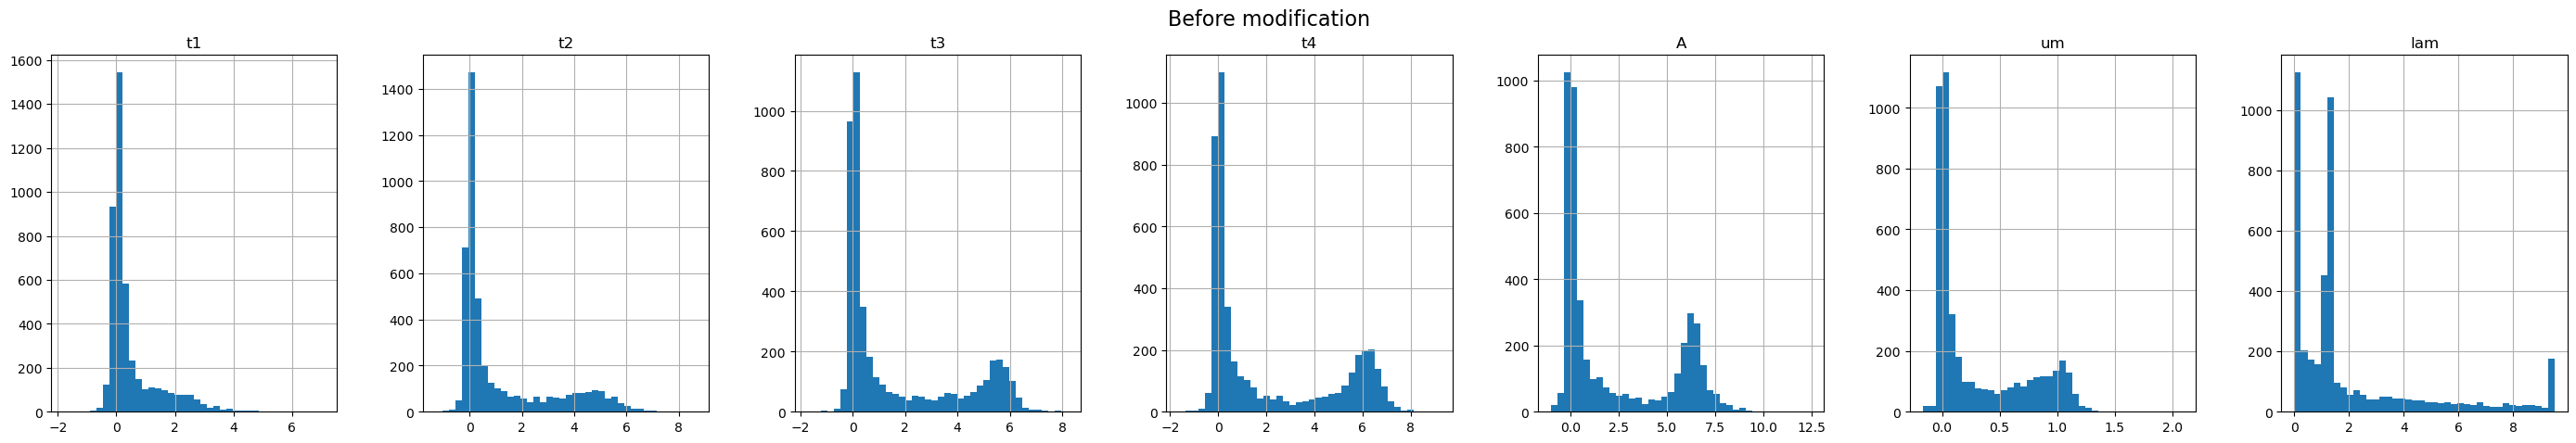

In [21]:
pre_res[["t1", "t2", "t3", "t4" , "A", "um", "lam"]].hist(bins=40, figsize=(35,5), layout=(1,7))
plt.suptitle("Before modification", fontsize=16)
# pdf.savefig(bbox_inches='tight')
plt.show()
plt.close()

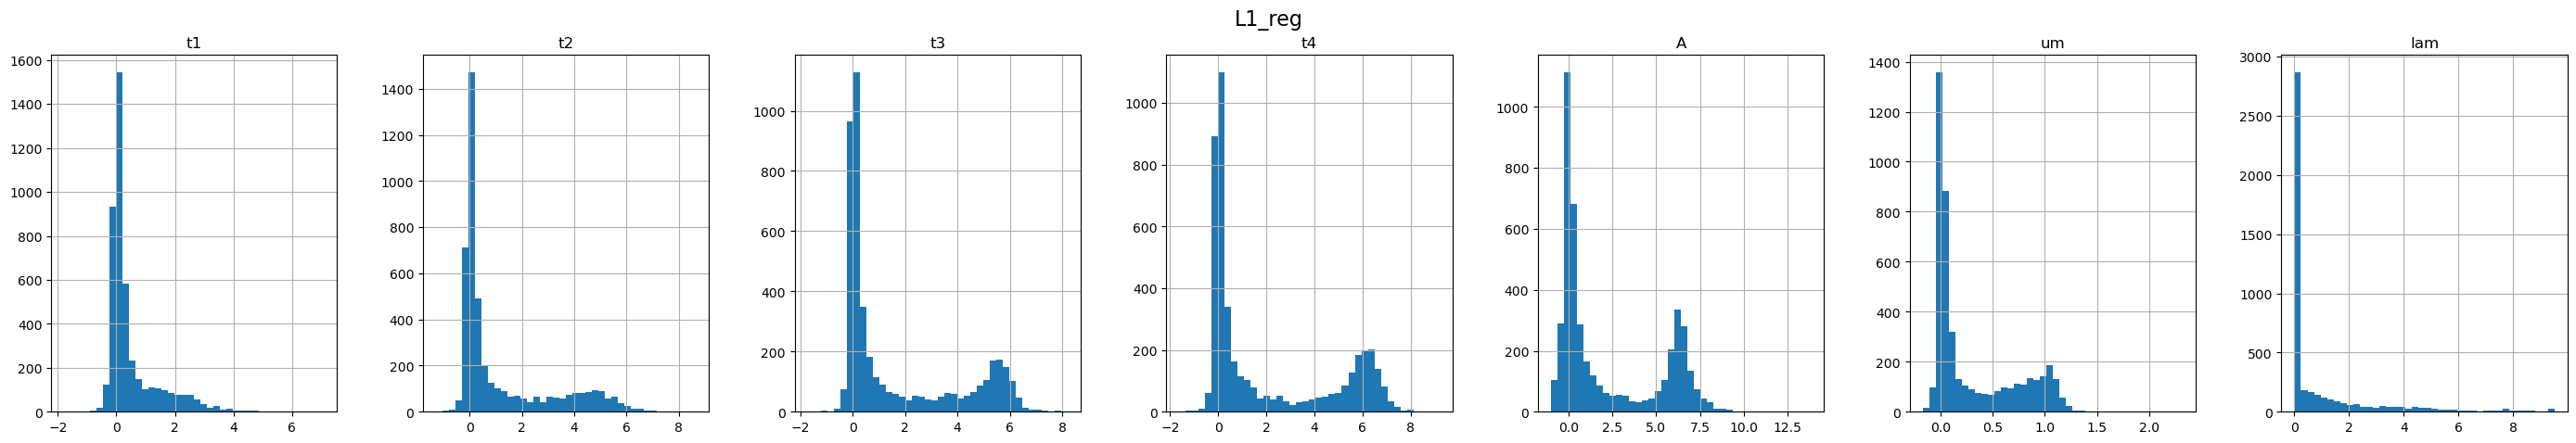

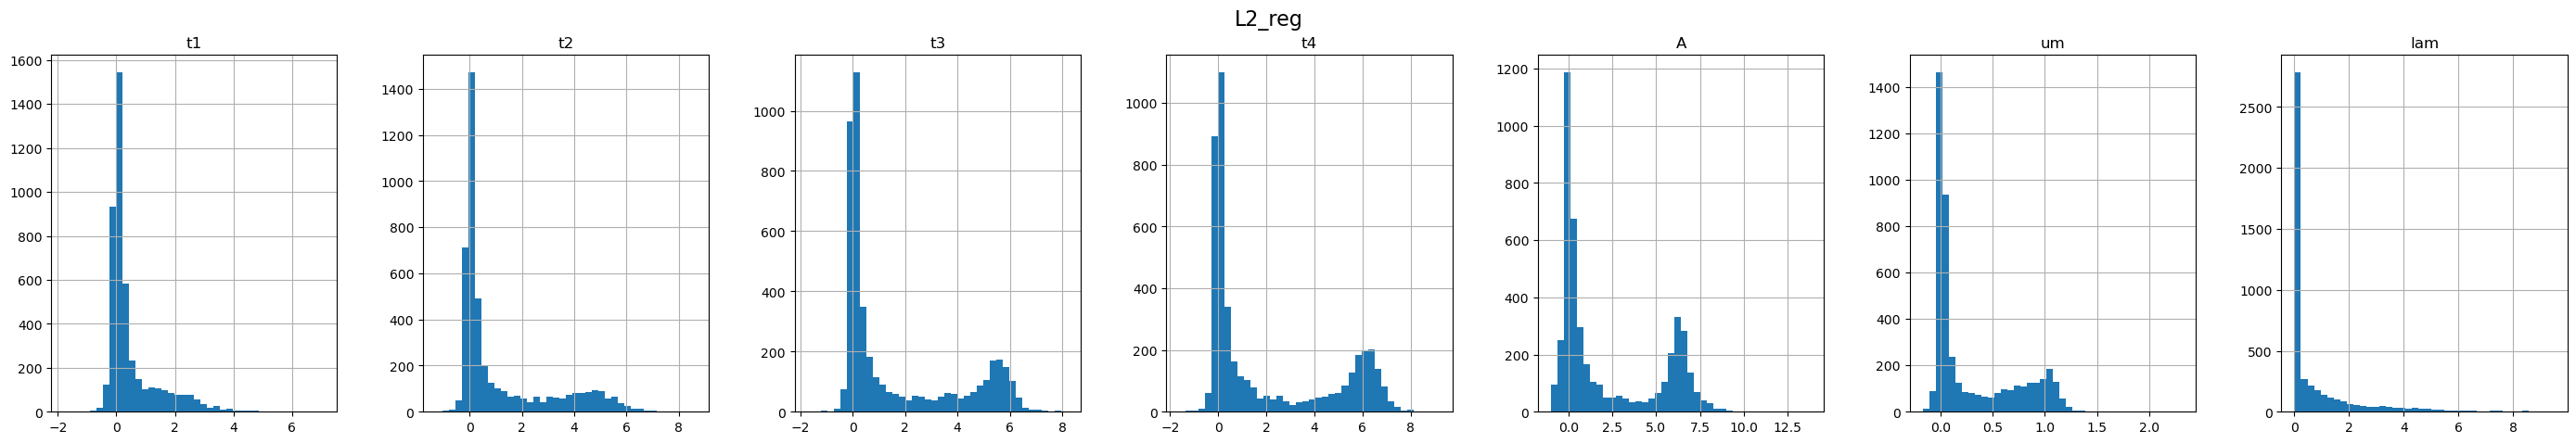

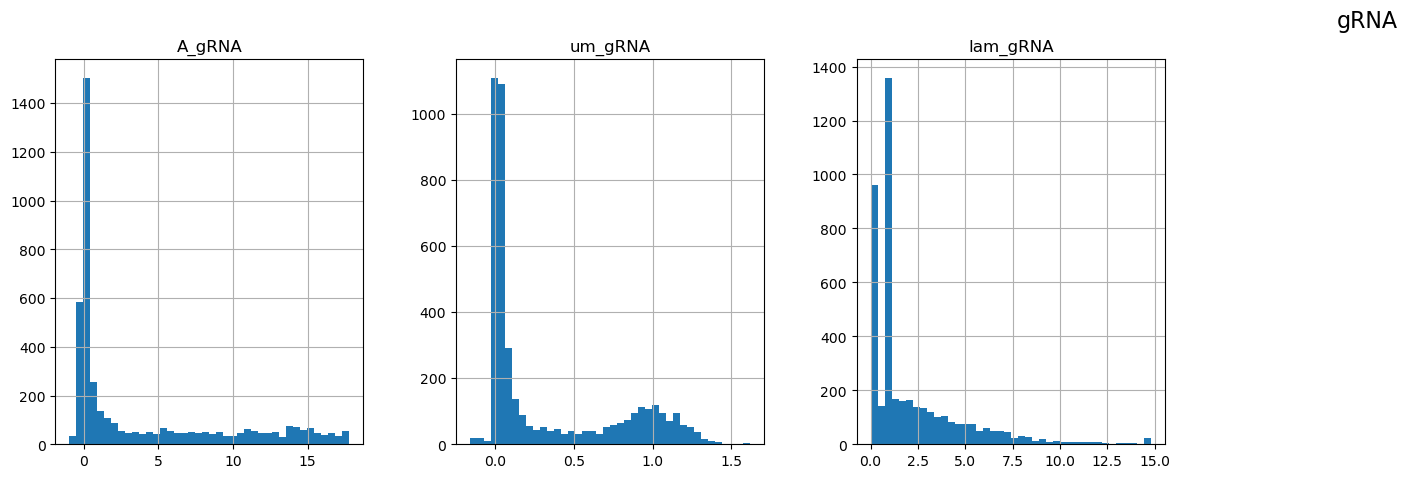

In [30]:
L1_res[["t1", "t2", "t3", "t4" , "A", "um", "lam"]].hist(bins=40, figsize=(35,5), layout=(1,7))
plt.suptitle("L1_reg", fontsize=16)
# pdf.savefig(bbox_inches='tight')
plt.show()
plt.close()

L2_res[["t1", "t2", "t3", "t4" , "A", "um", "lam"]].hist(bins=40, figsize=(35,5), layout=(1,7))
plt.suptitle("L2_reg", fontsize=16)
# pdf.savefig(bbox_inches='tight')
plt.show()
plt.close()

gRNA[["A_gRNA", "um_gRNA", "lam_gRNA"]].hist(bins=40, figsize=(35,5), layout=(1,7))
plt.suptitle("gRNA", fontsize=16)
# pdf.savefig(bbox_inches='tight')
plt.show()
plt.close()

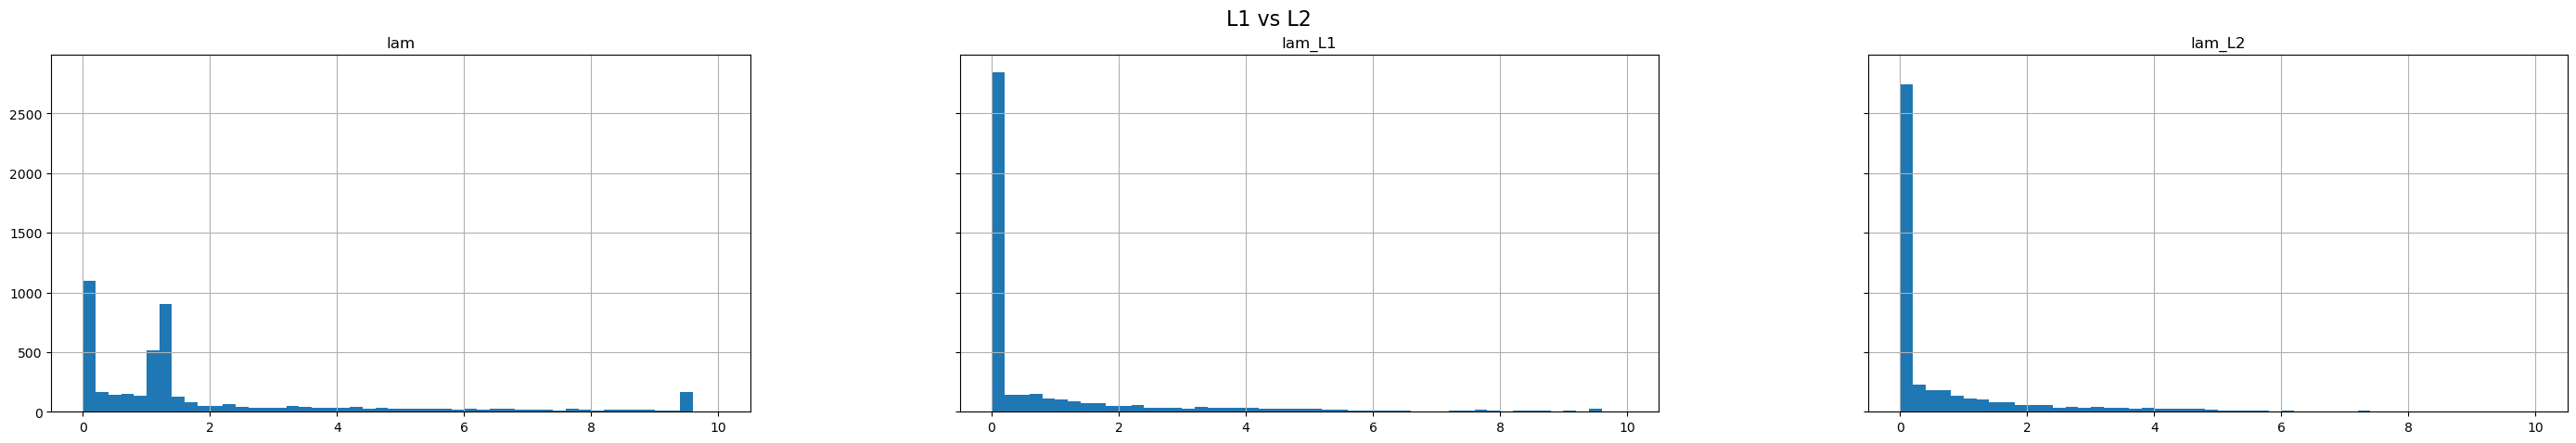

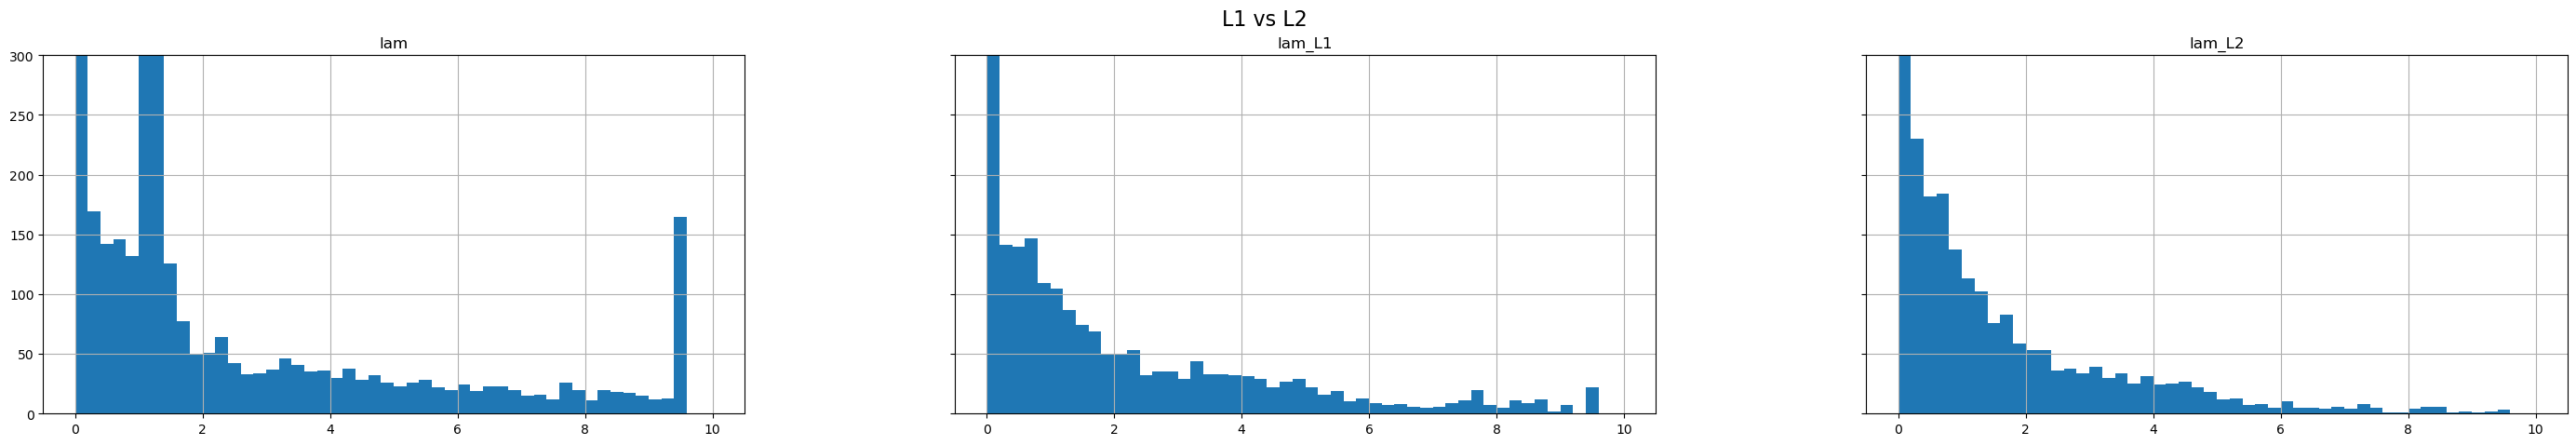

In [36]:
lam_bins = np.arange(0, 10.1, 0.2)

merged_res[["lam", "lam_L1", "lam_L2"]].hist(bins=lam_bins, figsize=(35,5), layout=(1,3), sharex=True, sharey=True)
plt.suptitle("L1 vs L2", fontsize=16)
# pdf.savefig(bbox_inches='tight')
plt.show()
plt.close()

merged_res[["lam", "lam_L1", "lam_L2"]].hist(bins=lam_bins, figsize=(35,5), layout=(1,3), sharex=True, sharey=True)
plt.suptitle("L1 vs L2", fontsize=16)
plt.ylim(0, 300)
# pdf.savefig(bbox_inches='tight')
plt.show()
plt.close()


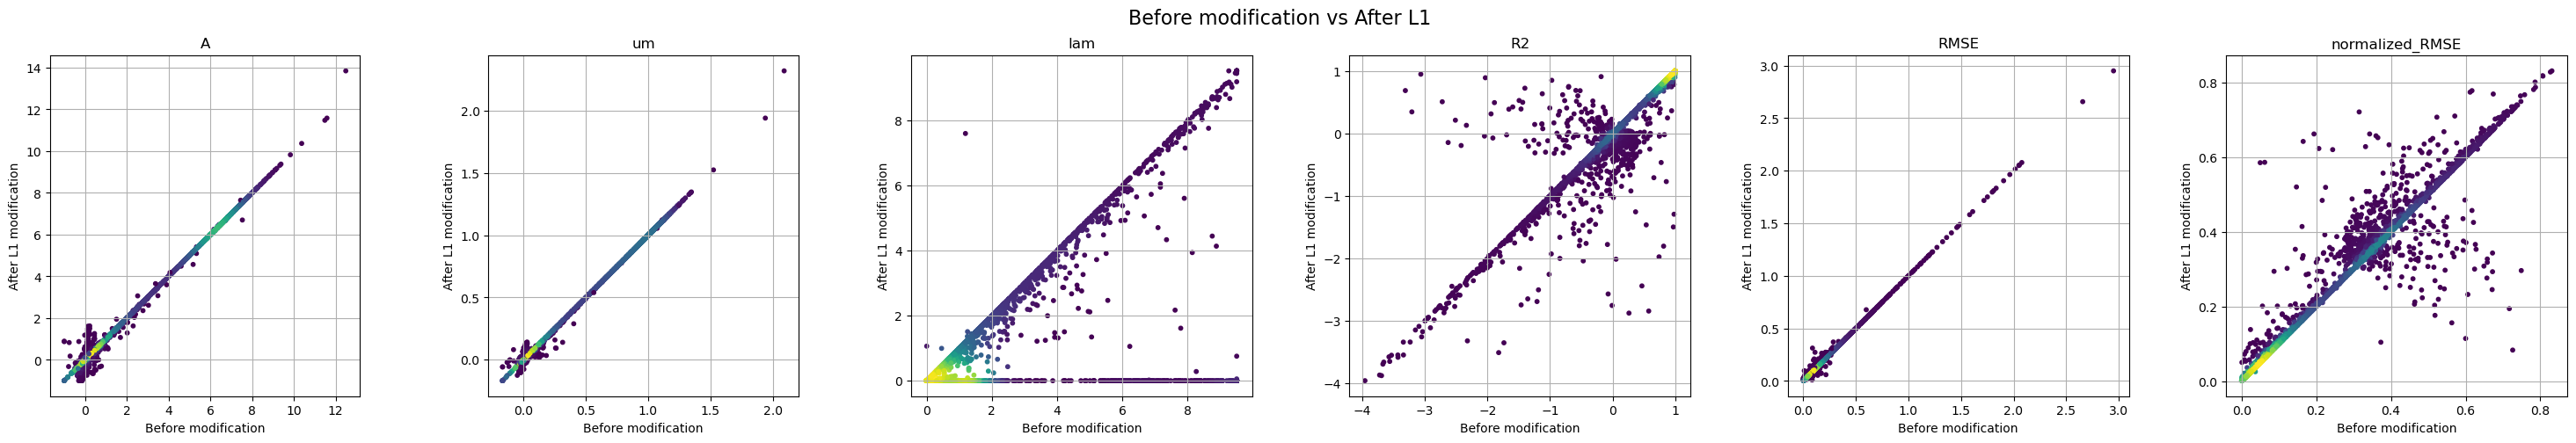

In [24]:
fig, ax = plt.subplots(1,6, figsize=(30,5))

for i, col in enumerate(["A", "um", "lam", "R2", "RMSE", "normalized_RMSE"]):
    x = merged_res[col]
    y = merged_res[col+"_L1"]
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    ax[i].scatter(x, y, c=z, s=10, cmap='viridis')
    ax[i].set_title(col)
    ax[i].set_xlabel("Before modification")
    ax[i].set_ylabel("After L1 modification")
    ax[i].set_aspect('equal')
    ax[i].grid(True)
    ax[i].set_title(col)
plt.suptitle("Before modification vs After L1", fontsize=16)
plt.tight_layout()
# pdf.savefig(bbox_inches='tight')
plt.show()
plt.close()

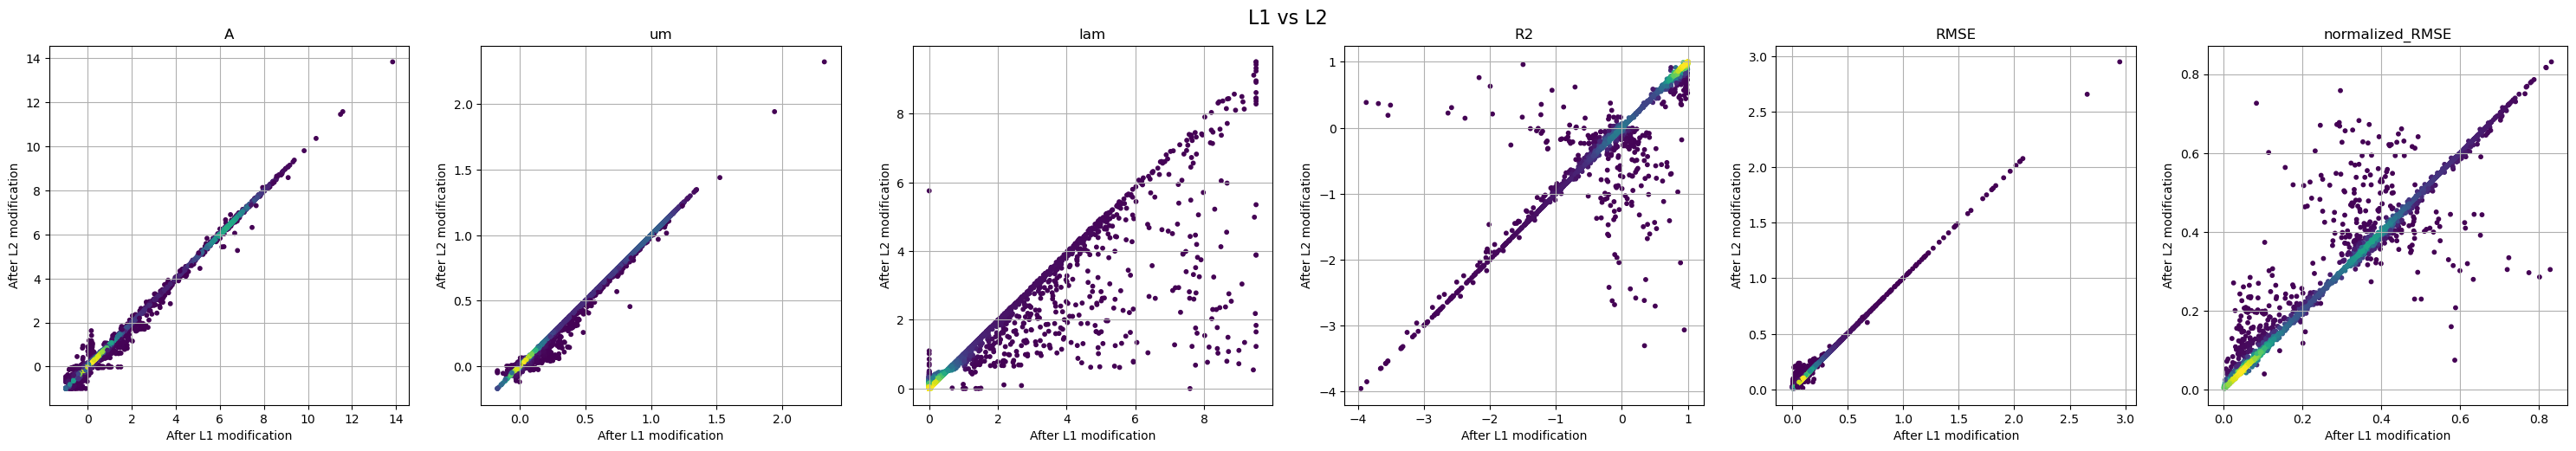

In [25]:
fig, ax = plt.subplots(1,6, figsize=(30,5))

for i, col in enumerate(["A", "um", "lam", "R2", "RMSE", "normalized_RMSE"]):
    x = merged_res[col+"_L1"]
    y = merged_res[col+"_L2"]
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    ax[i].scatter(x, y, c=z, s=10, cmap='viridis')
    ax[i].set_title(col)
    ax[i].set_xlabel("After L1 modification")
    ax[i].set_ylabel("After L2 modification")
    ax[i].set_aspect('equal')
    ax[i].grid(True)
    ax[i].set_title(col)

plt.suptitle("L1 vs L2", fontsize=16)
plt.tight_layout()
# pdf.savefig(bbox_inches='tight')
plt.show()
plt.close()

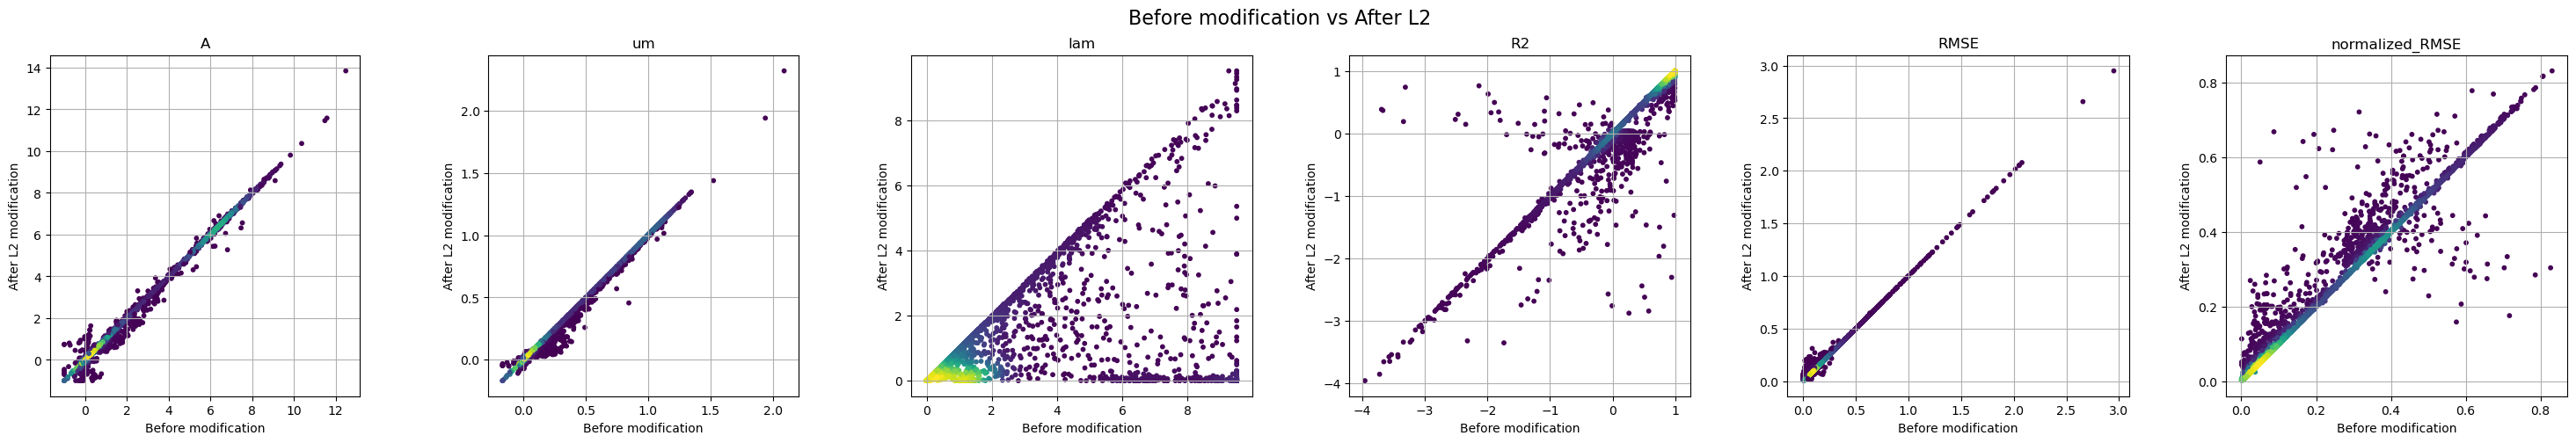

In [27]:
fig, ax = plt.subplots(1,6, figsize=(30,5))

for i, col in enumerate(["A", "um", "lam", "R2", "RMSE", "normalized_RMSE"]):
    x = merged_res[col]
    y = merged_res[col+"_L2"]
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    ax[i].scatter(x, y, c=z, s=10, cmap='viridis')
    ax[i].set_title(col)
    ax[i].set_xlabel("Before modification")
    ax[i].set_ylabel("After L2 modification")
    ax[i].set_aspect('equal')
    ax[i].grid(True)
    ax[i].set_title(col)

plt.suptitle("Before modification vs After L2", fontsize=16)
plt.tight_layout()
# pdf.savefig(bbox_inches='tight')
plt.show()
plt.close()

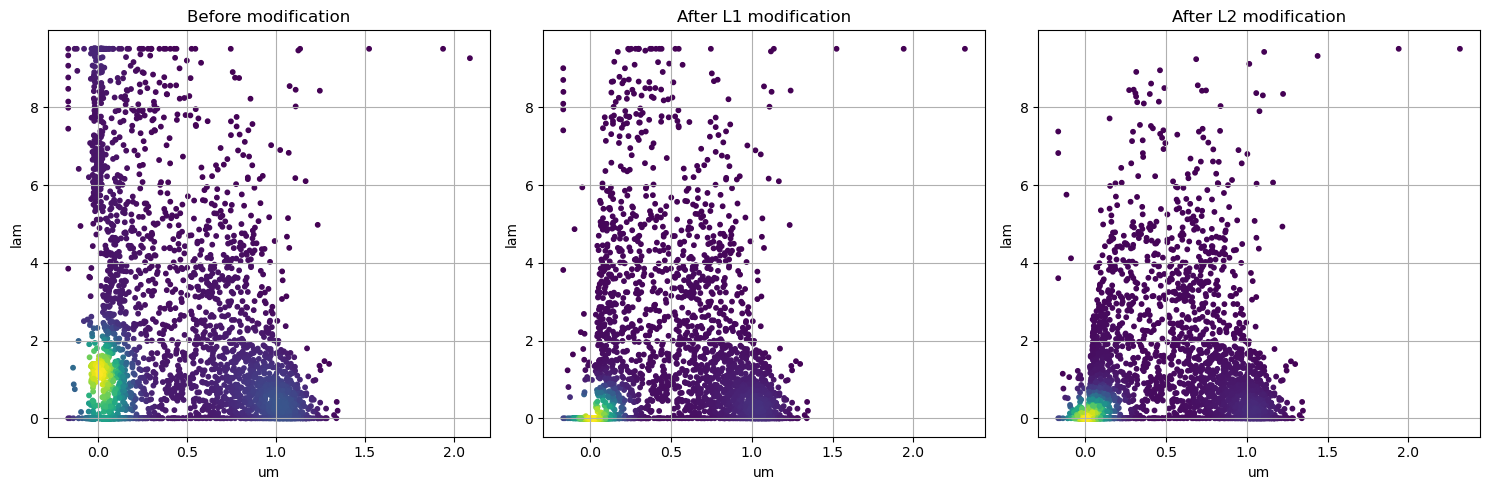

In [26]:
fig, ax = plt.subplots(1,3, figsize=(15,5))

for idx, df in enumerate([pre_res, L1_res, L2_res]):
    x = df["um"]
    y = df["lam"]
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    ax[idx].scatter(x, y, c=z, s=10, cmap='viridis')
    ax[idx].set_xlabel("um")
    ax[idx].set_ylabel("lam")
    ax[idx].grid(True)

ax[0].set_title("Before modification")
ax[1].set_title("After L1 modification")
ax[2].set_title("After L2 modification")

plt.tight_layout()
# pdf.savefig(bbox_inches='tight')
plt.show()
plt.close()

In [67]:
pdf.close()

In [32]:
df

Systematic ID     Name FYPOviability DeletionLibrary_essentiality  \
0      SPAC1002.02    pom34        viable                            V   
1     SPAC1002.03c     gls2        viable                            V   
2     SPAC1002.04c    taf11      inviable                            E   
3     SPAC1002.05c     jmj2        viable                            V   
4     SPAC1002.06c     bqt2        viable                            V   
...            ...      ...           ...                          ...   
4514      SPMIT.01     cox1       unknown               Not_determined   
4515      SPMIT.04     cox3       unknown               Not_determined   
4516      SPMIT.05     cob1       unknown               Not_determined   
4517      SPMIT.07     atp6       unknown               Not_determined   
4518      SPMTR.02  mat2-Pi       unknown               Not_determined   

                            time_points   Status      A     um    lam     R2  \
0     [0.0, 2.352, 5.588, 9.104, 12.48]  Success  0.125 -0.009  0.001 -0.460   
1     [0.0, 2.352, 5.588, 9.104, 12.48]  Success  0.254  0.025 -0.000  0.253   
2     [0.0, 2.352, 5.588, 9.104, 12.48]  Success  8.717  0.725  2.609  0.997   
3     [0.0, 2.352, 5.588, 9.104, 12.48]  Success  0.119 -0.008  0.001 -0.746   
4     [0.0, 2.352, 5.588, 9.104, 12.48]  Success -0.134 -0.022 -0.000  0.207   
...                                 ...      ...    ...    ...    ...    ...   
4514  [0.0, 2.352, 5.588, 9.104, 12.48]  Success -0.090  0.015 -0.000 -0.779   
4515  [0.0, 2.352, 5.588, 9.104, 12.48]  Success  0.744 -0.048  0.057 -0.124   
4516  [0.0, 2.352, 5.588, 9.104, 12.48]  Success -1.000 -0.125  0.531  0.601   
4517  [0.0, 2.352, 5.588, 9.104, 12.48]  Success -0.812 -0.136  0.764  0.229   
4518  [0.0, 2.352, 5.588, 9.104, 12.48]  Success  1.081  0.181 -0.000  0.080   

      ...  t3_fitted  t4_fitted  t0_residual  t1_residual  t2_residual  \
0     ...      0.000      0.000       -0.008        0.028       -0.148   
1     ...      0.200      0.231       -0.017        0.104       -0.164   
2     ...      4.661      6.510       -0.065        0.177       -0.206   
3     ...      0.000      0.000       -0.008        0.049       -0.121   
4     ...     -0.128     -0.132        0.009       -0.073       -0.038   
...   ...        ...        ...          ...          ...          ...   
4514  ...     -0.000     -0.000        0.006        0.028       -0.346   
4515  ...      0.000      0.000       -0.050        0.224       -0.533   
4516  ...     -0.864     -0.955        0.038        0.068       -0.200   
4517  ...     -0.764     -0.801        0.017        0.317       -0.687   
4518  ...      1.036      1.071       -0.071        1.000       -0.700   

      t3_residual  t4_residual  Consistency at temperatures  \
0           0.000       -0.265                   Consistent   
1           0.187       -0.090                   Consistent   
2           0.146       -0.048                   Consistent   
3          -0.147       -0.123                   Consistent   
4          -0.020        0.079                   Consistent   
...           ...          ...                          ...   
4514       -0.068       -0.344                          NaN   
4515        0.219       -0.552                          NaN   
4516        0.496       -0.519                          NaN   
4517        1.038       -0.525                          NaN   
4518        0.282       -0.095                          NaN   

      One or multi basic phenotypes       Category  
0                     One phenotype             WT  
1                     One phenotype             WT  
2                     One phenotype  microcolonies  
3                     One phenotype             WT  
4                     One phenotype             WT  
...                             ...            ...  
4514                            NaN            NaN  
4515                            NaN            NaN  
4516                            

/tmp/ipykernel_2453957/3853146972.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
/tmp/ipykernel_2453957/3853146972.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)


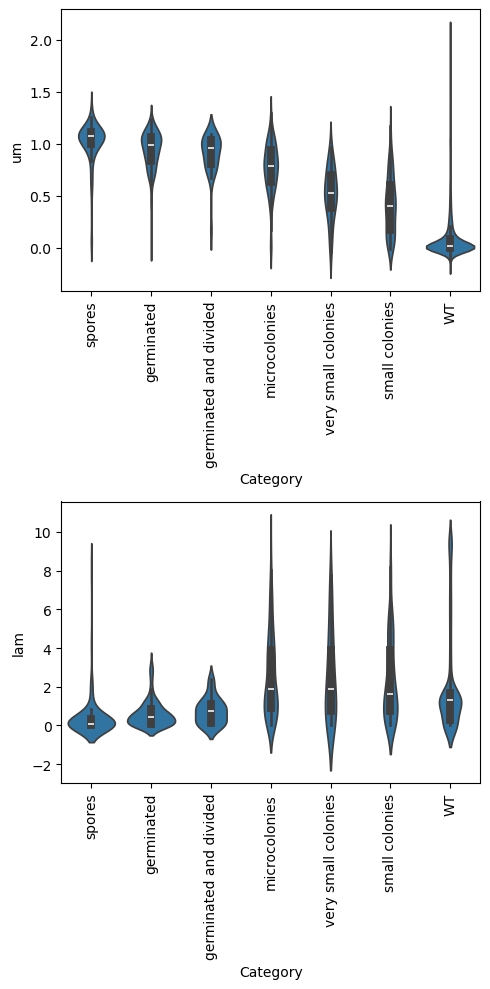

/tmp/ipykernel_2453957/3853146972.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
/tmp/ipykernel_2453957/3853146972.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)


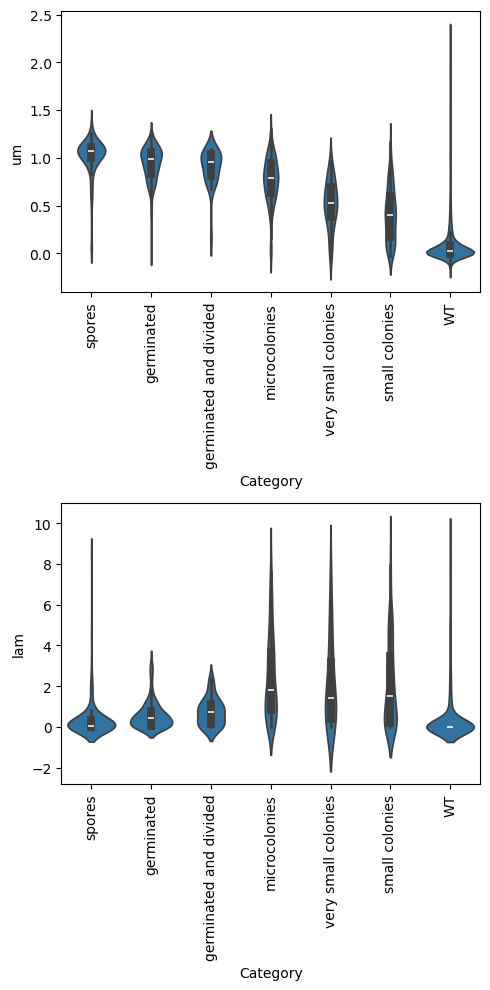

/tmp/ipykernel_2453957/3853146972.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
/tmp/ipykernel_2453957/3853146972.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)


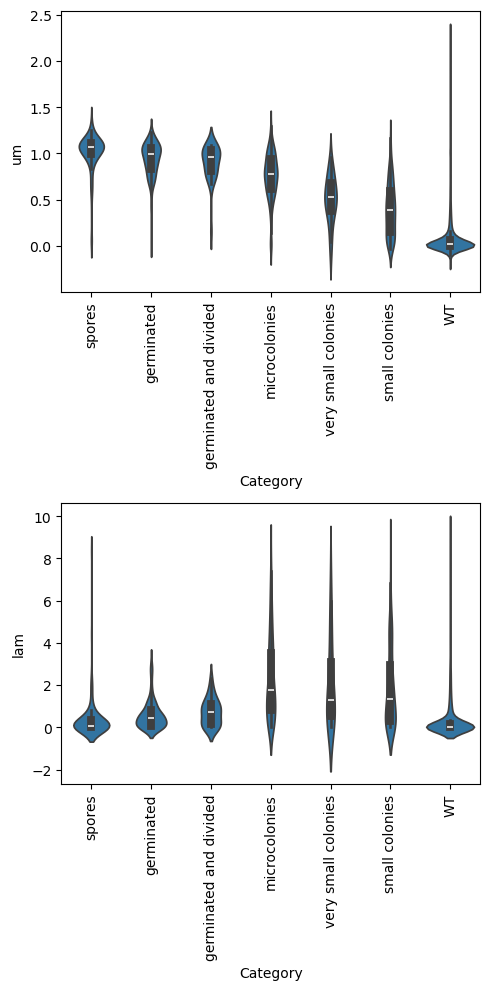

In [35]:
def category_plot(df, selected_categories):

    selected_df = df.query("Category in @selected_categories and `One or multi basic phenotypes` == 'One phenotype' ")

    fig, ax = plt.subplots(2,1, figsize=(5,10))
    
    sns.violinplot(data=selected_df, x="Category", y="um", ax=ax[0], order=selected_categories)
    sns.violinplot(data=selected_df, x="Category", y="lam", ax=ax[1], order=selected_categories)

    # set the xlabel with 90 rotation
    ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
    ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)

    plt.tight_layout()
    plt.show()
    plt.close()

selected_categories = ["spores", "germinated", "germinated and divided", "microcolonies", "very small colonies", "small colonies", "WT"]

category_plot(pre_res, selected_categories)
category_plot(L1_res, selected_categories)
category_plot(L2_res, selected_categories)

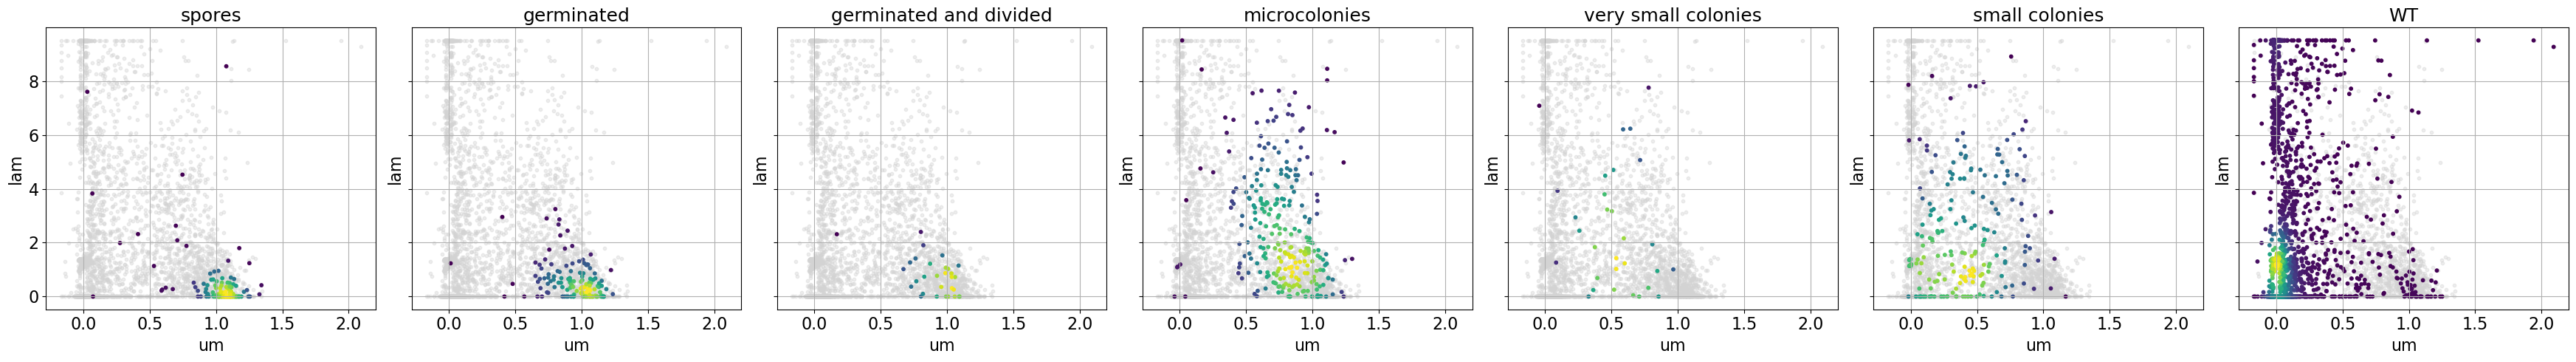

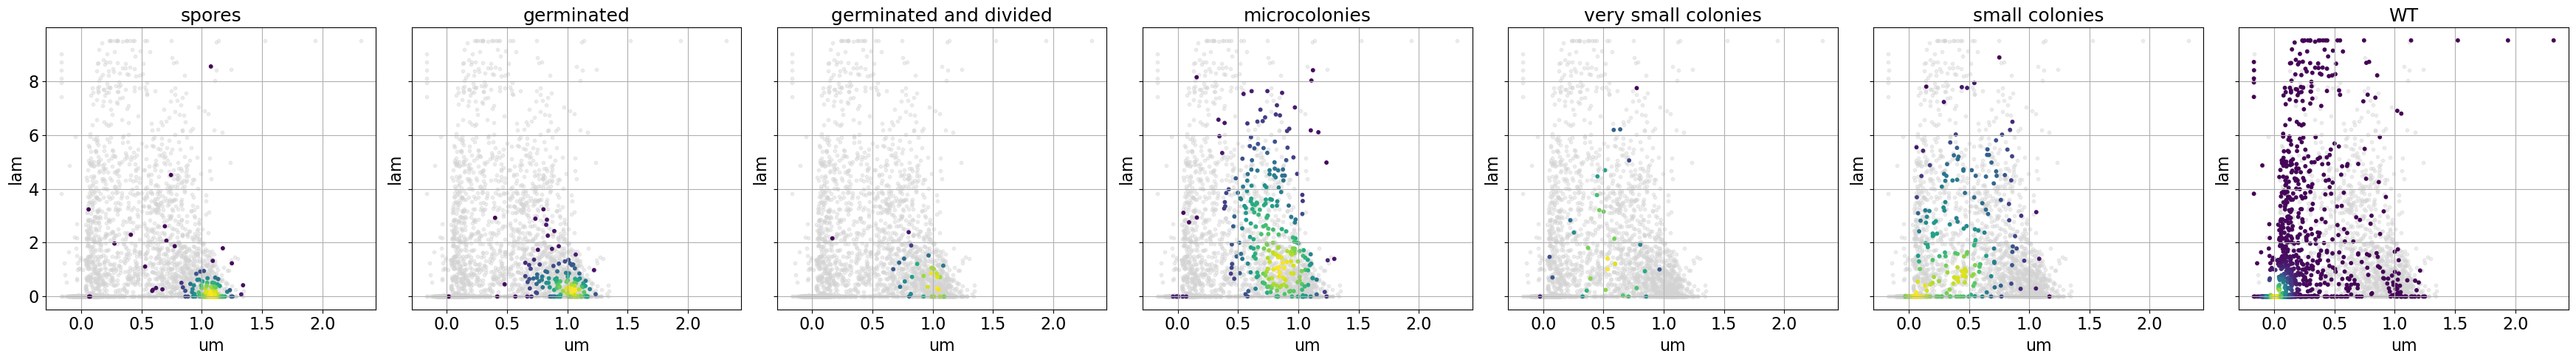

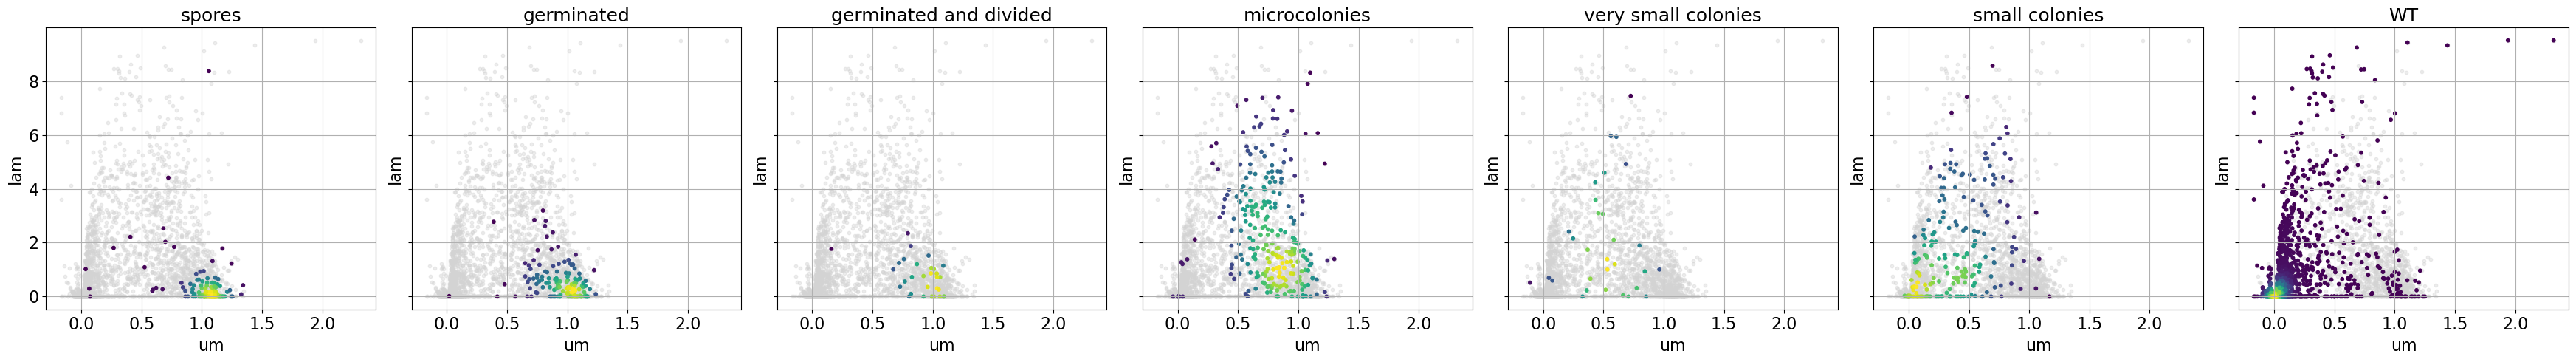

In [34]:
def category_scatter(df, selected_categories):

    selected_df = df.query("Category in @selected_categories and `One or multi basic phenotypes` == 'One phenotype'")

    fig, ax = plt.subplots(1,len(selected_categories), figsize=(len(selected_categories)*5,5), sharex=True, sharey=True)

    for i, category in enumerate(selected_categories):

        x_all = df["um"]
        y_all = df["lam"]
        ax[i].scatter(x_all, y_all, c='lightgray', s=10, alpha=0.4)

        x = selected_df.query("Category == @category")["um"]
        y = selected_df.query("Category == @category")["lam"]
        xy = np.vstack([x,y])
        z = gaussian_kde(xy)(xy)
        ax[i].scatter(x, y, c=z, s=10, cmap='viridis')
        ax[i].set_title(category, fontsize=18)
        ax[i].set_xlabel("um", fontsize=16)
        ax[i].set_ylabel("lam", fontsize=16)
        ax[i].tick_params(axis='both', which='major', labelsize=16)
        ax[i].grid(True)

    plt.tight_layout()
    plt.show()
    plt.close()

category_scatter(pre_res, selected_categories)
category_scatter(L1_res, selected_categories)
category_scatter(L2_res, selected_categories)

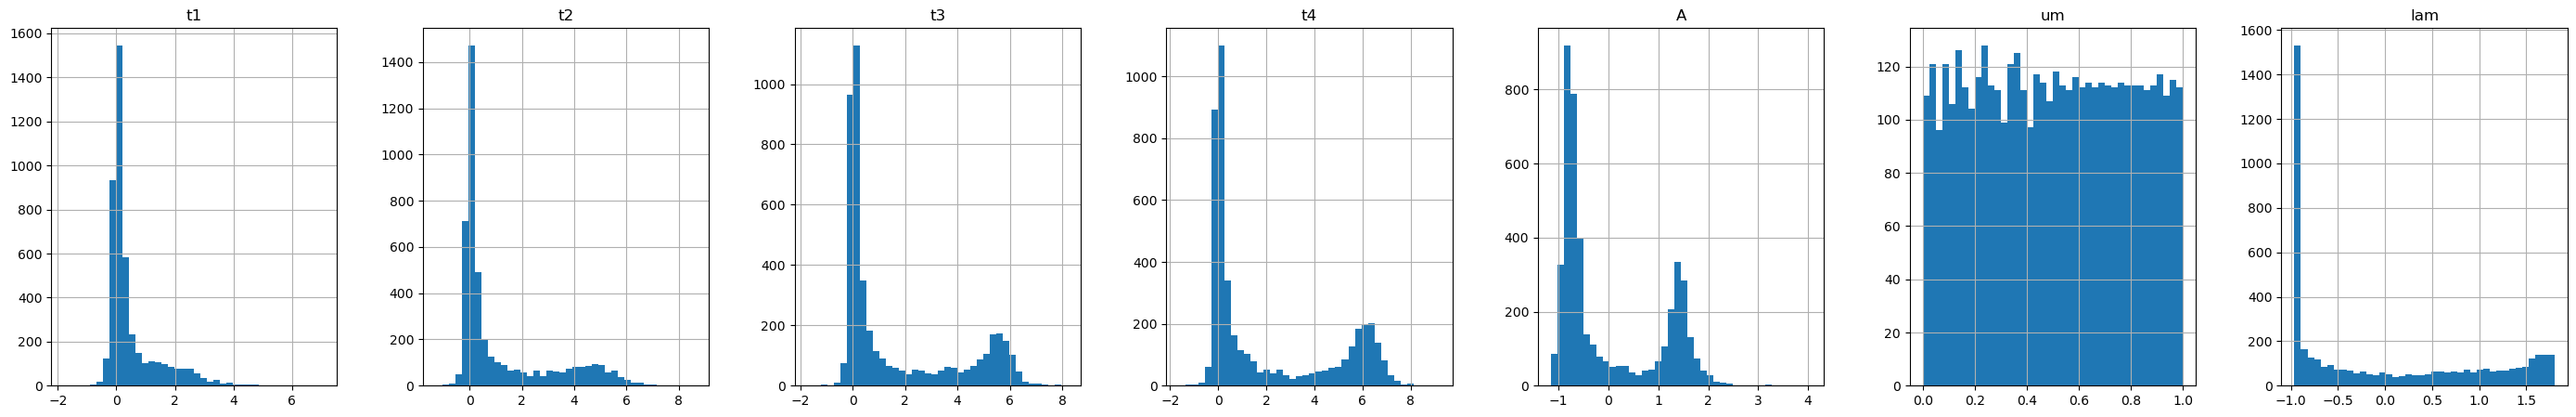

In [26]:
std = StandardScaler()

transformed_data = res.copy()

A = transformed_data["A"].values
A_transformed = std.fit_transform(A.reshape(-1, 1)).flatten()
transformed_data["A"] = A_transformed

um = transformed_data["um"].values
qt = QuantileTransformer(output_distribution='uniform')
um = qt.fit_transform(um.reshape(-1, 1)).flatten()
transformed_data["um"] = um

pt = PowerTransformer(method='yeo-johnson')
lam = transformed_data["lam"].values
lam_transformed = pt.fit_transform(lam.reshape(-1, 1)).flatten()
lam_transformed_std = std.fit_transform(lam_transformed.reshape(-1, 1)).flatten()
transformed_data["lam"] = lam_transformed_std

transformed_data[["t1", "t2", "t3", "t4", "A", "um", "lam"]].hist(bins=40, figsize=(35,5), layout=(1,7))
plt.show()
plt.close()

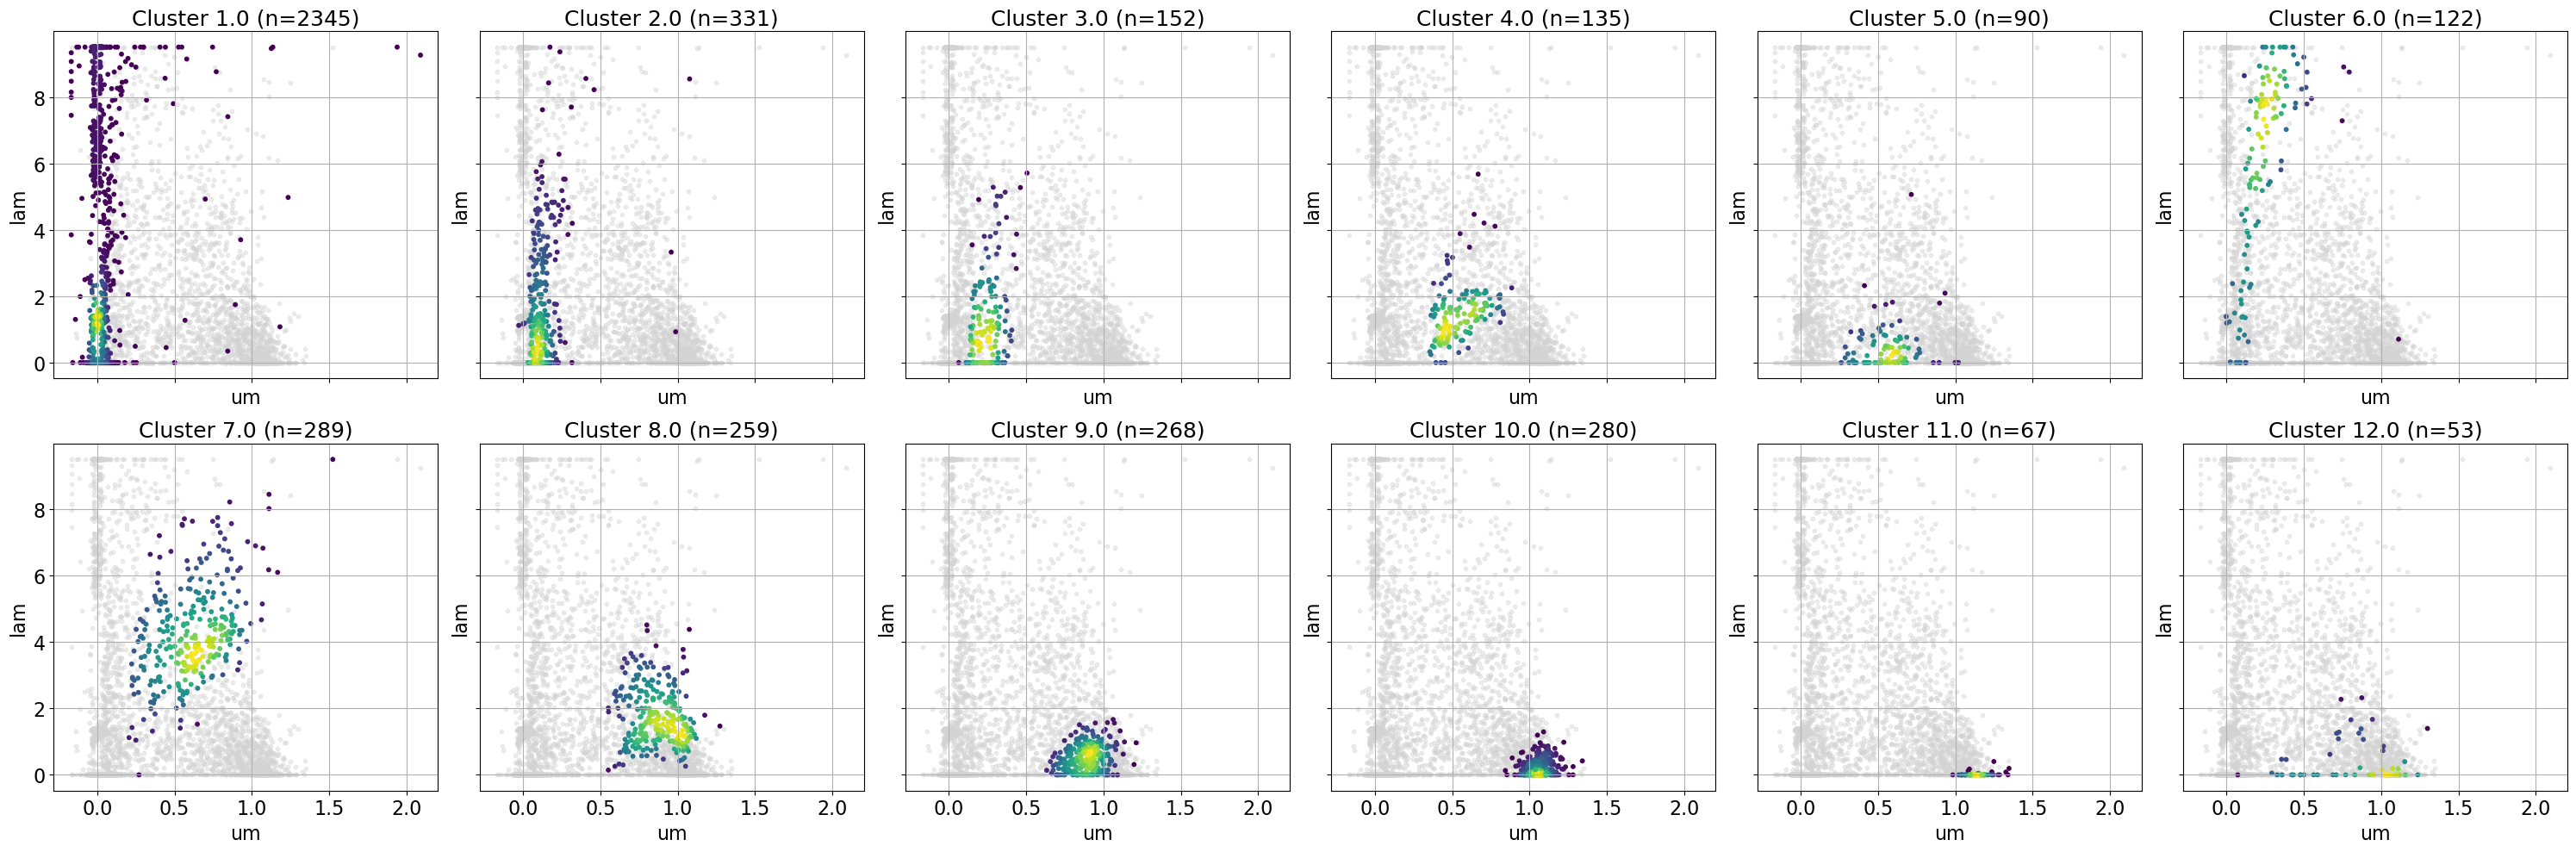

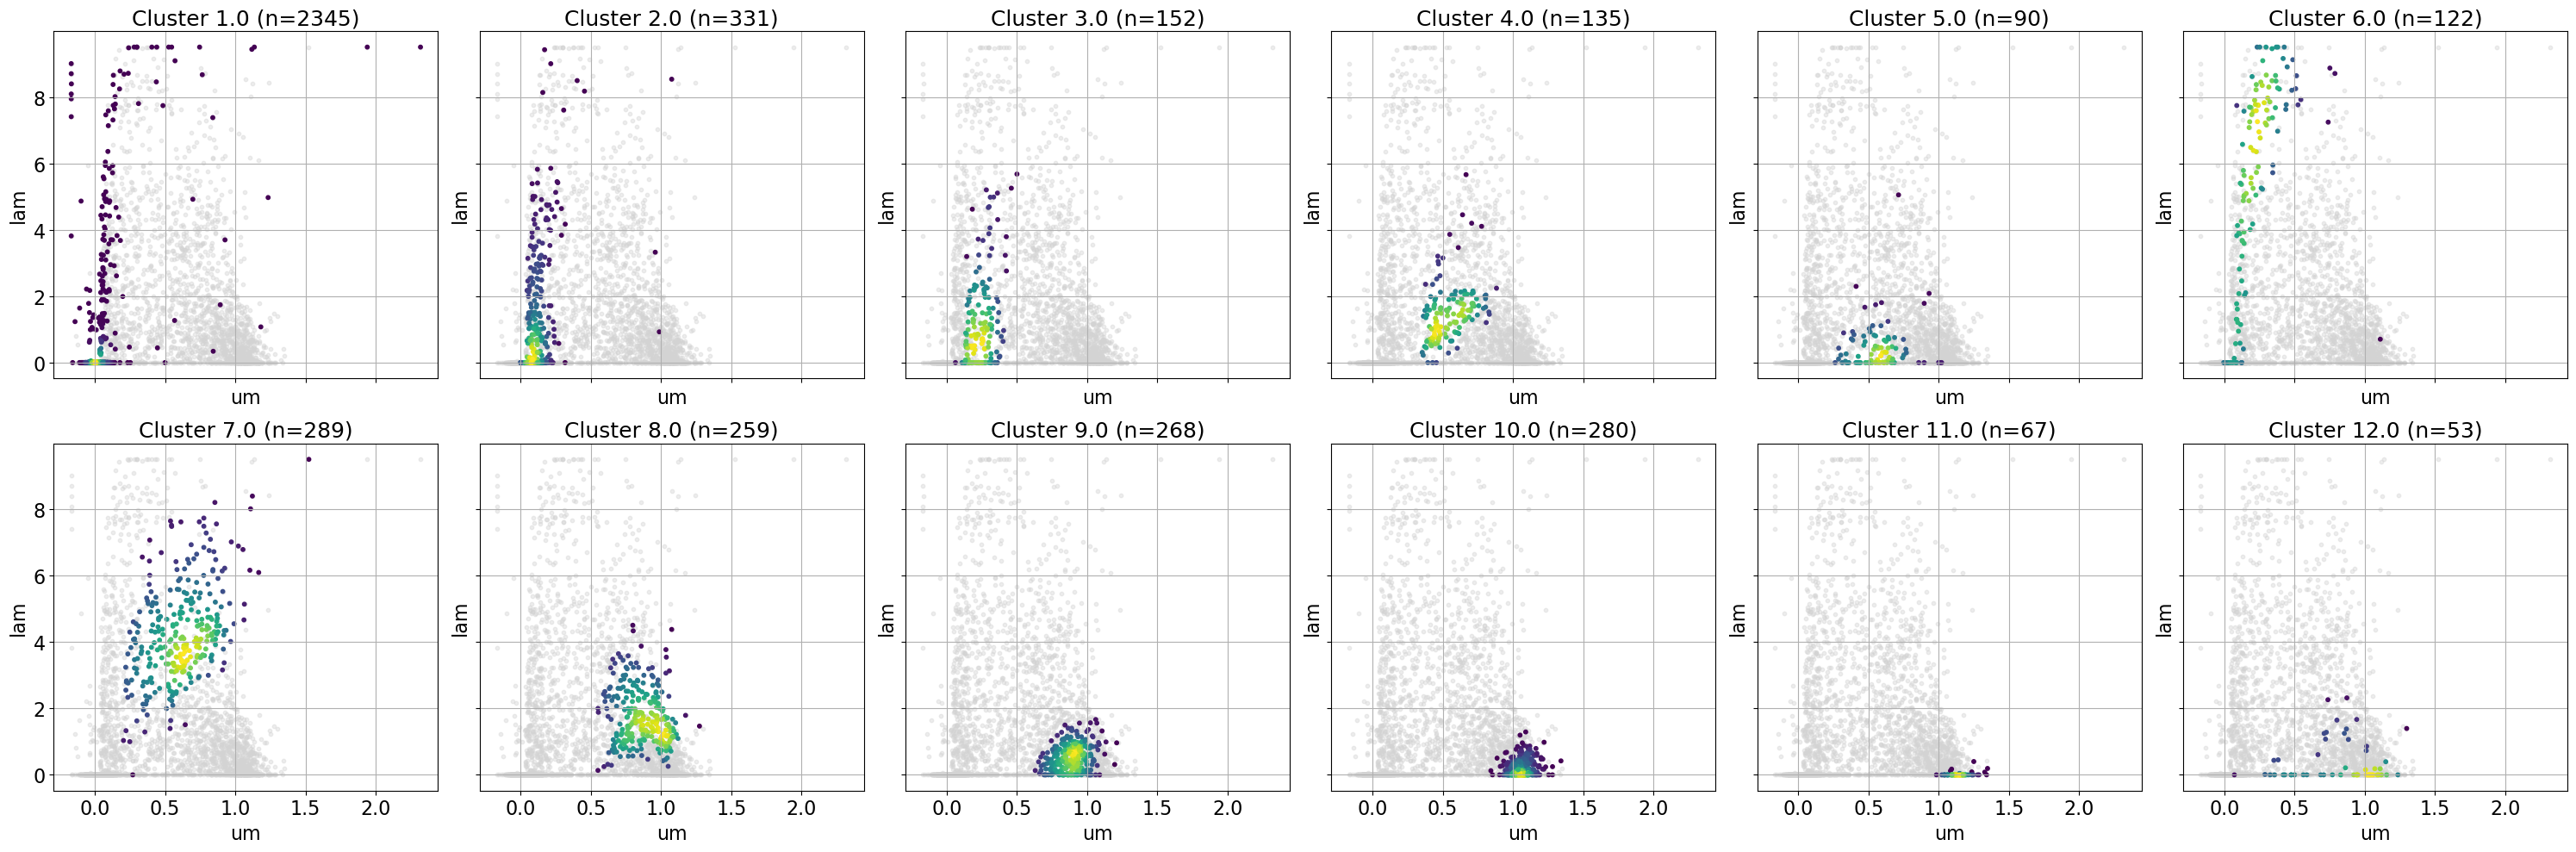

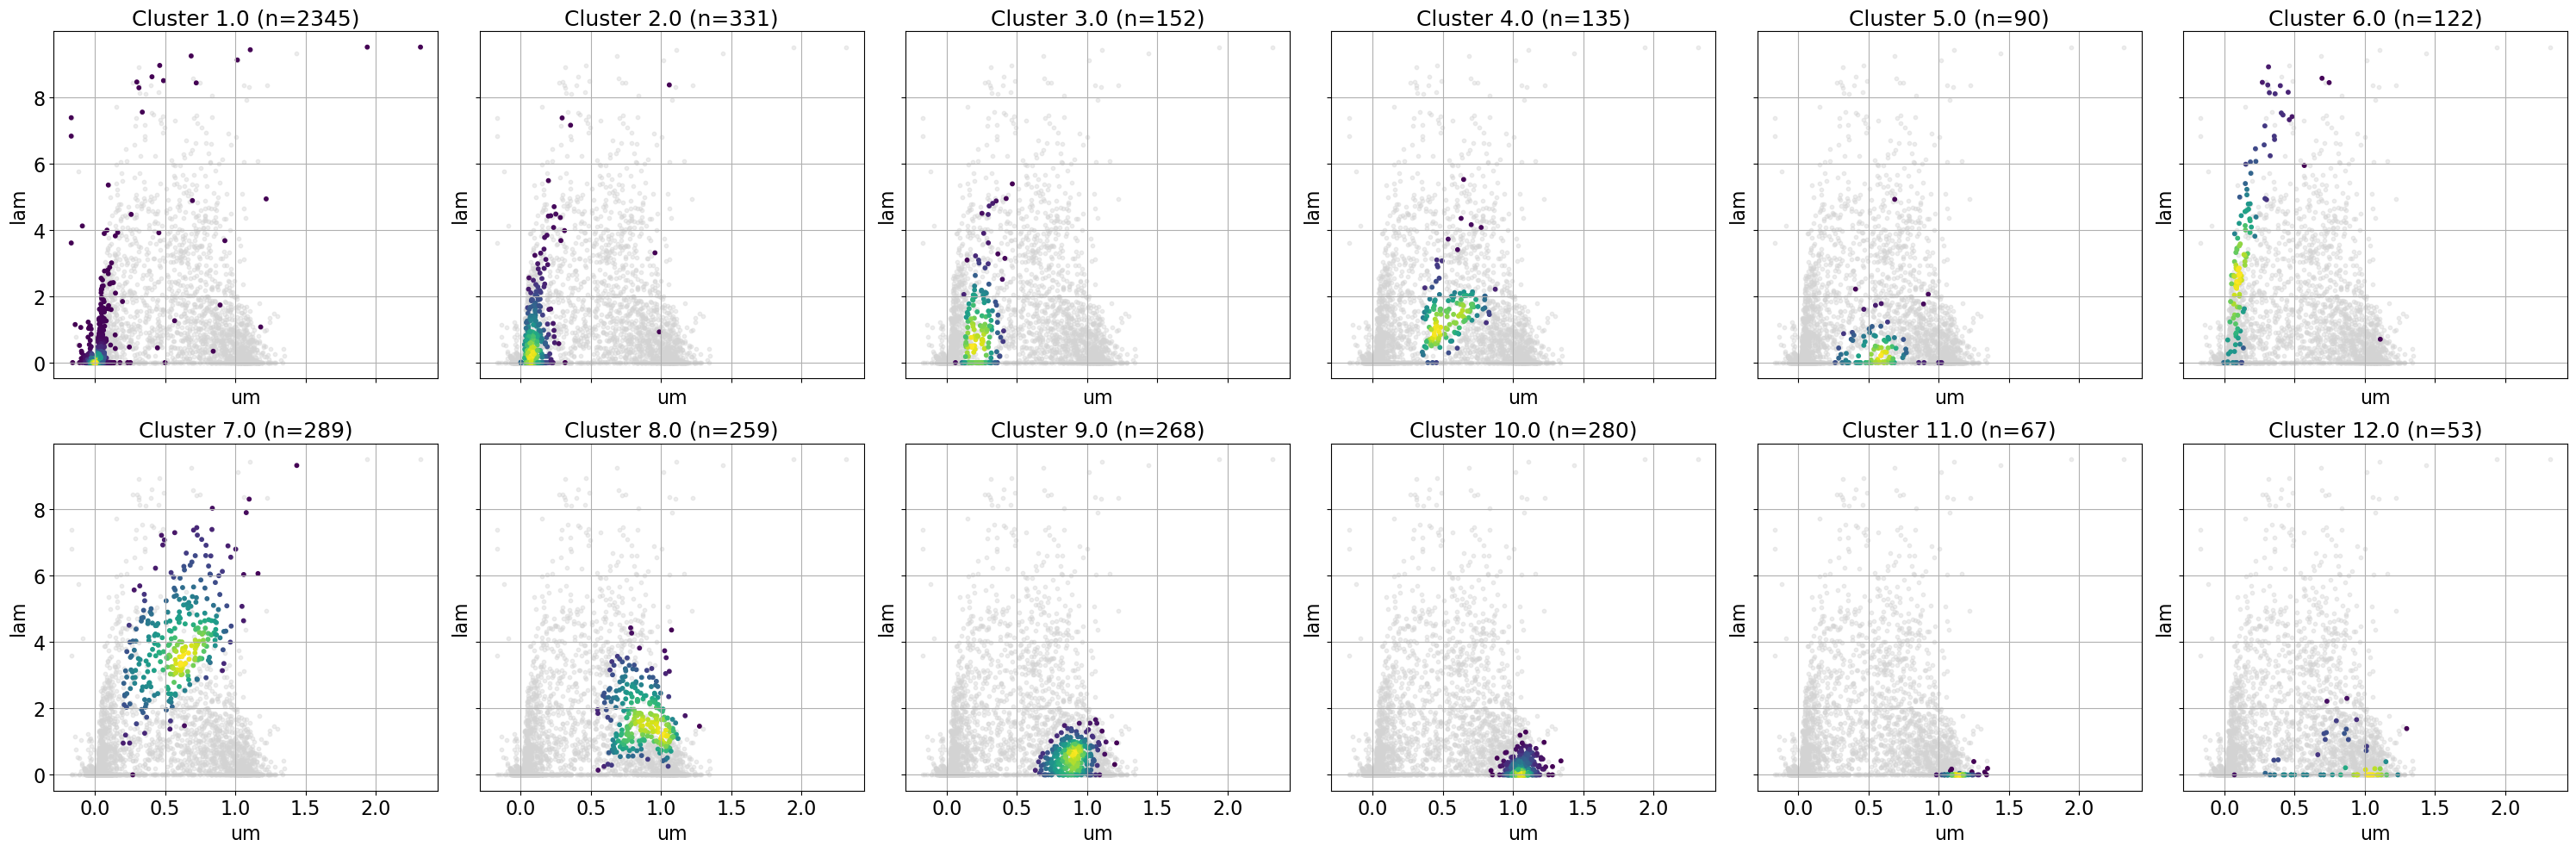

In [49]:
def cluster_scatter(df):

    selected_df = df[df["cluster"].notna()]
    clusters = sorted(selected_df["cluster"].unique().tolist())

    fig, axes = plt.subplots(2,len(clusters)//2, figsize=(len(clusters)//2*5,10), sharex=True, sharey=True)
    axes = axes.flatten()
    for i, cluster in enumerate(clusters):
        ax = axes[i]
        x_all = df["um"]
        y_all = df["lam"]
        ax.scatter(x_all, y_all, c='lightgray', s=10, alpha=0.4)

        x = selected_df.query("cluster == @cluster")["um"]
        y = selected_df.query("cluster == @cluster")["lam"]
        xy = np.vstack([x,y])
        z = gaussian_kde(xy)(xy)
        ax.scatter(x, y, c=z, s=10, cmap='viridis')
        ax.set_title(f"Cluster {cluster} (n={len(x)})", fontsize=18)
        ax.set_xlabel("um", fontsize=16)
        ax.set_ylabel("lam", fontsize=16)
        ax.tick_params(axis='both', which='major', labelsize=16)
        ax.grid(True)

    plt.tight_layout()
    plt.show()
    plt.close()

cluster_scatter(pre_res)
cluster_scatter(L1_res)
cluster_scatter(L2_res)

In [18]:
merged_res["um_bin"] = pd.cut(merged_res["um"], bins=np.concatenate(([-0.5], np.arange(-0.1, 1.1, 0.2), [2.5])))
merged_res["um_bin_range"] = merged_res["um_bin"].apply(lambda x: f"{x.left}-{x.right}")

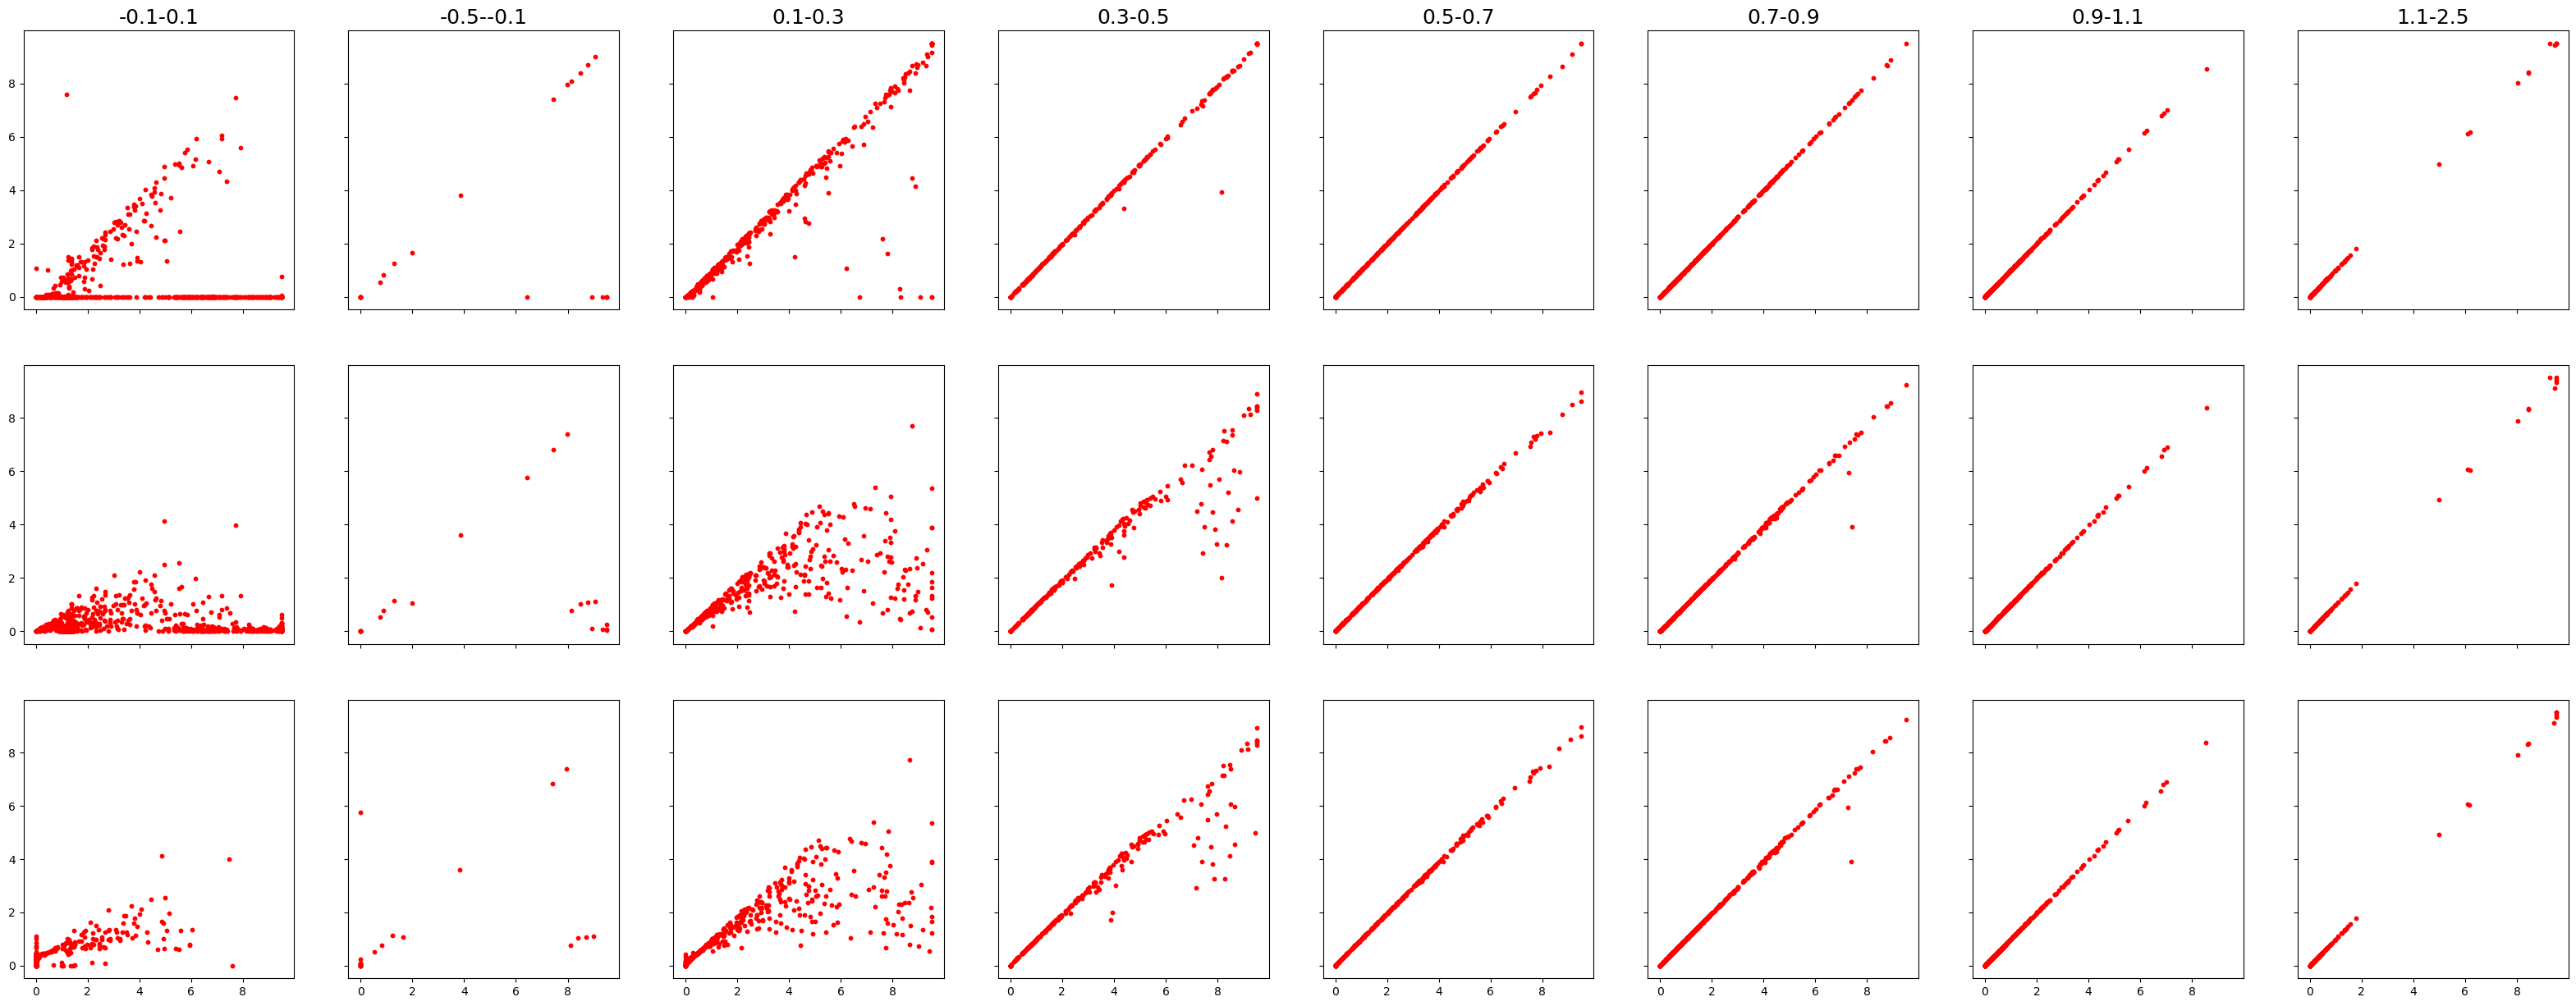

In [19]:
um_bin_range_labels = sorted(merged_res["um_bin_range"].unique().tolist())

fig, ax = plt.subplots(3, len(um_bin_range_labels), figsize=(5*len(um_bin_range_labels), 5*3), sharex=True, sharey=True)

for col, um_bin_range_label in enumerate(um_bin_range_labels):

    x_lam = merged_res.query("um_bin_range == @um_bin_range_label")["lam"]
    x_L1_lam = merged_res.query("um_bin_range == @um_bin_range_label")["lam_L1"]
    x_L2_lam = merged_res.query("um_bin_range == @um_bin_range_label")["lam_L2"]

    ax[0, col].scatter(x_lam, x_L1_lam, c='red', s=10, alpha=1)

    ax[1, col].scatter(x_lam, x_L2_lam, c='red', s=10, alpha=1)

    ax[2, col].scatter(x_L1_lam, x_L2_lam, c='red', s=10, alpha=1)

    ax[0, col].set_title(um_bin_range_label, fontsize=18)

plt.show()
plt.close()


In [24]:
merged_res.query("um_bin_range == '0.3-0.5' and (lam_L1 - lam_L2) > 1 and (lam_L1 - lam_L2) < 2")

Systematic ID          Name FYPOviability DeletionLibrary_essentiality  \
125   SPAC11H11.04          mam2        viable                            V   
524    SPAC1834.05          alg9        viable                            V   
1375    SPAC3G9.02          oar2        viable                            V   
1438    SPAC4C5.03    SPAC4C5.03        viable                            V   
1918    SPAC9G1.07    SPAC9G1.07        viable                            V   
1957  SPAP27G11.16  SPAP27G11.16        viable                            V   
2079    SPBC106.19         ppr10        viable                            V   
2496   SPBC1711.05         srp40        viable                            V   
2638   SPBC19C2.02          pmt1        viable                            V   
3189   SPBC3B9.22c          dad4       unknown               Not_determined   
3276   SPBC428.08c          clr4        viable                            V   
3832   SPCC1281.05          rsc7      inviable                            E   
3858  SPCC1393.07c          mug4        viable                            V   
4468   SPCC965.05c          thp1        viable                            V   

                         time_points_L1 Status_L1   A_L1  um_L1  lam_L1  \
125   [0.0, 2.352, 5.588, 9.104, 12.48]   Success  2.422  0.406   9.511   
524   [0.0, 2.352, 5.588, 9.104, 12.48]   Success  1.900  0.317   7.353   
1375  [0.0, 2.352, 5.588, 9.104, 12.48]   Success  2.842  0.364   7.683   
1438  [0.0, 2.352, 5.588, 9.104, 12.48]   Success  3.314  0.454   8.183   
1918  [0.0, 2.352, 5.588, 9.104, 12.48]   Success  2.356  0.392   8.245   
1957  [0.0, 2.352, 5.588, 9.104, 12.48]   Success  2.631  0.441   9.511   
2079  [0.0, 2.352, 5.588, 9.104, 12.48]   Success  2.401  0.402   8.501   
2496  [0.0, 2.352, 5.588, 9.104, 12.48]   Success  2.029  0.309   4.060   
2638  [0.0, 2.352, 5.588, 9.104, 12.48]   Success  2.500  0.419   9.167   
3189  [0.0, 2.352, 5.588, 9.104, 12.48]   Success  1.622  0.140   3.933   
3276  [0.0, 2.352, 5.588, 9.104, 12.48]   Success  1.800  0.302   7.613   
3832  [0.0, 2.352, 5.588, 9.104, 12.48]   Success  3.293  0.346   5.955   
3858  [0.0, 2.352, 5.588, 9.104, 12.48]   Success  2.208  0.370   9.511   
4468  [0.0, 2.352, 5.588, 9.104, 12.48]   Success  2.551  0.427   9.511   

      R2_L1  ...  t1_residual  t2_residual  t3_residual  t4_residual  cluster  \
125   0.991  ...       -0.004        0.002       -0.105        0.008      1.0   
524   0.947  ...       -0.321       -0.060        0.003       -0.001      6.0   
1375  0.998  ...       -0.045        0.056       -0.005       -0.001      6.0   
1438  0.864  ...        0.451        0.314       -0.010        0.002      2.0   
1918  0.962  ...        0.245        0.059       -0.001        0.001      6.0   
1957  0.886  ...        0.301        0.194       -0.026        0.003      1.0   
2079  0.990  ...        0.026        0.128        0.000        0.000      2.0   
2496  0.994  ...        0.122       -0.011        0.010       -0.005      3.0   
2638  0.873  ...        0.413       -0.027        0.000        0.000      6.0   
3189  0.767  ...        0.141        0.455       -0.018        0.004      6.0   
3276  0.977  ...       -0.090       -0.166        0.004       -0.001      6.0   
3832  0.954  ...       -0.027        0.323       -0.218        0.086      6.0   
3858  0.979  ...        0.031       -0.012       -0.141        0.011      6.0   
4468  0.972  ...        0.140       -0.115       -0.059        0.005      6.0   

      Consistency at temperatures  One or multi basic phenotypes  \
125                    Consistent                  One phenotype   
524                    Consistent                  One phenotype   
1375                 Inconsistent                            NaN   
1438                   Consistent                  One phenotype   
1918                   Consistent                  One phenotype   
1957                   Only at 32                  One phenotype   
2

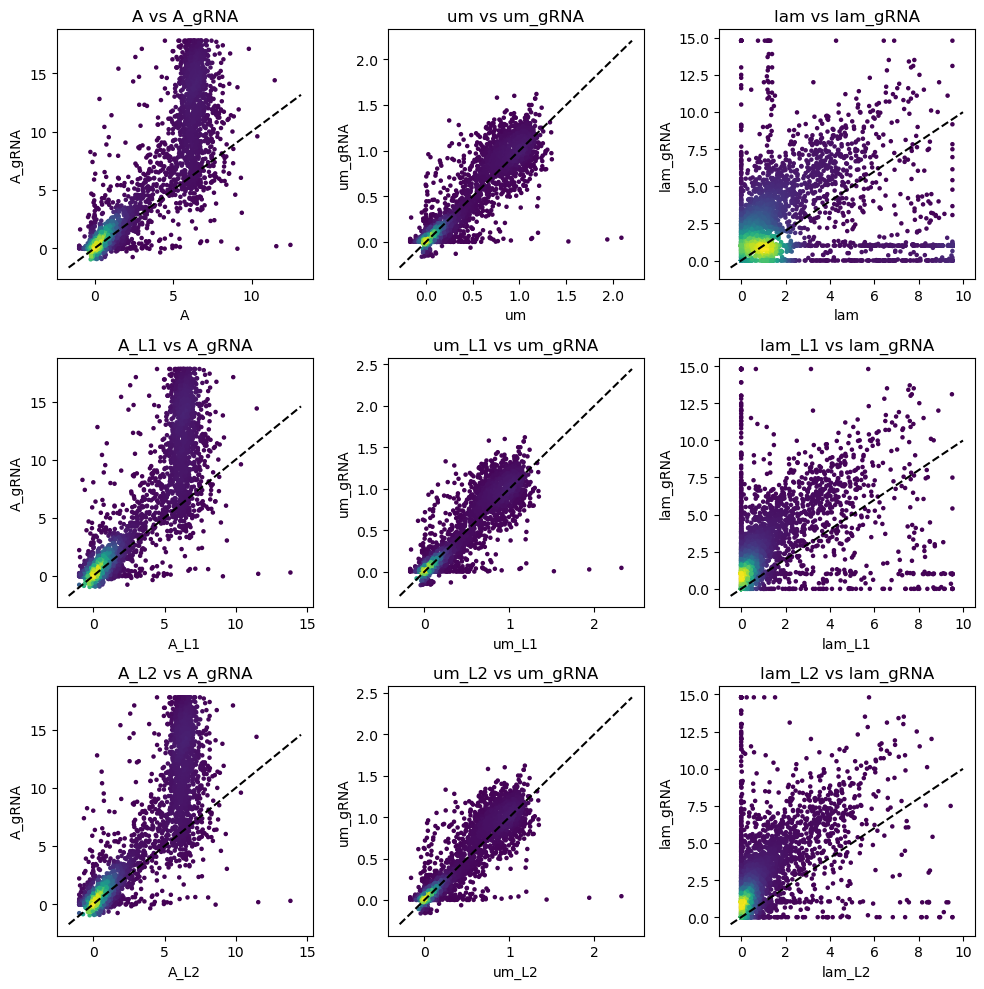

In [35]:
fig, ax = plt.subplots(3, 3, figsize=(10, 10))

for row, row_data in enumerate(["", "_L1", "_L2"]):
    for col, col_data in enumerate(["A", "um", "lam"]):
        x = merged_res[f"{col_data}{row_data}"]
        y = merged_res[f"{col_data}_gRNA"]
        x, y = x[x.notna() & y.notna()], y[x.notna() & y.notna()]
        xy = np.vstack([x, y])
        z = gaussian_kde(xy)(xy)
        ax[row, col].scatter(x, y, c=z, s=5, alpha=1)
        # set the diagonal line
        xmin, xmax = ax[row, col].get_xlim()
        ymin, ymax = ax[row, col].get_ylim()
        ax[row, col].plot([xmin, xmax], [xmin, xmax], color="black", linestyle="--")
        ax[row, col].set_xlabel(f"{col_data}{row_data}")
        ax[row, col].set_ylabel(f"{col_data}_gRNA")
        ax[row, col].set_title(f"{col_data}{row_data} vs {col_data}_gRNA")

plt.tight_layout()
plt.show()
plt.close()

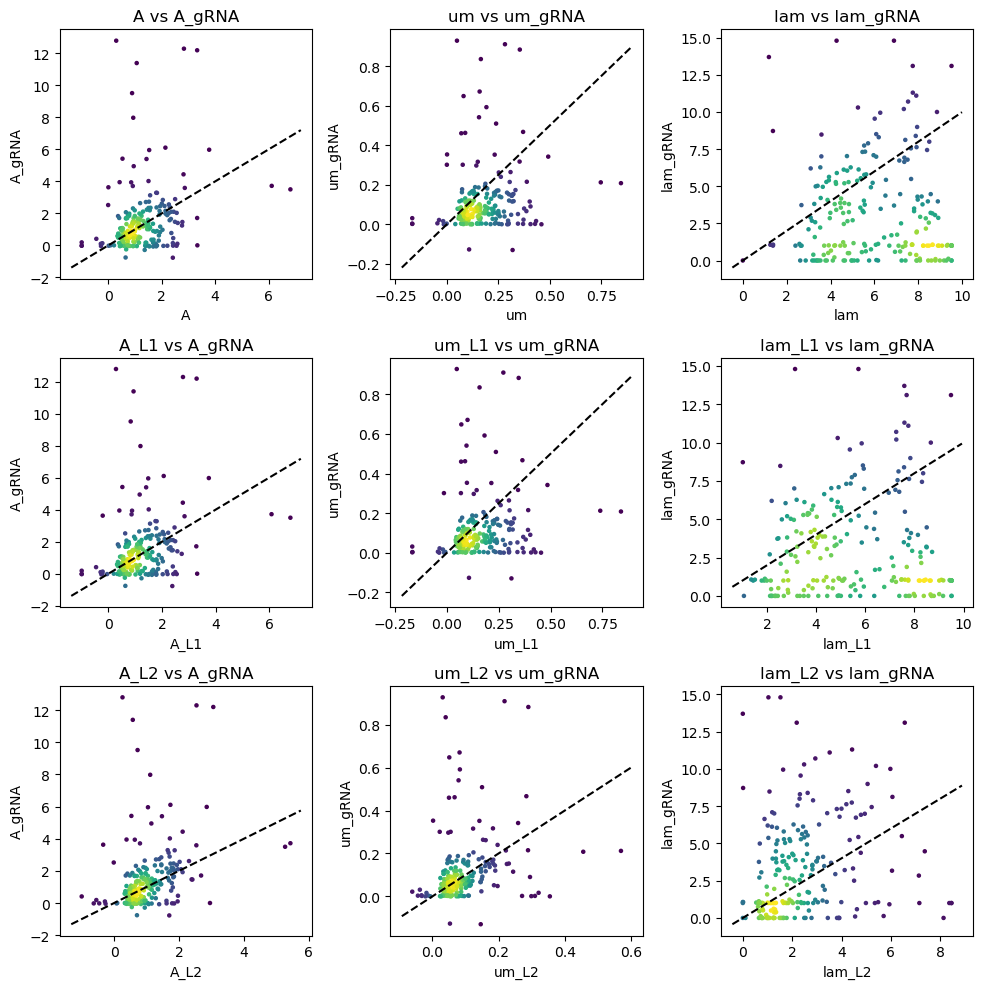

In [38]:
fig, ax = plt.subplots(3, 3, figsize=(10, 10))

for row, row_data in enumerate(["", "_L1", "_L2"]):
    for col, col_data in enumerate(["A", "um", "lam"]):
        x = merged_res.query("(lam_L1 - lam_L2) > 1")[f"{col_data}{row_data}"]
        y = merged_res.query("(lam_L1 - lam_L2) > 1")[f"{col_data}_gRNA"]
        x, y = x[x.notna() & y.notna()], y[x.notna() & y.notna()]
        xy = np.vstack([x, y])
        z = gaussian_kde(xy)(xy)
        ax[row, col].scatter(x, y, c=z, s=5, alpha=1)
        # set the diagonal line
        xmin, xmax = ax[row, col].get_xlim()
        ymin, ymax = ax[row, col].get_ylim()
        ax[row, col].plot([xmin, xmax], [xmin, xmax], color="black", linestyle="--")
        ax[row, col].set_xlabel(f"{col_data}{row_data}")
        ax[row, col].set_ylabel(f"{col_data}_gRNA")
        ax[row, col].set_title(f"{col_data}{row_data} vs {col_data}_gRNA")

plt.tight_layout()
plt.show()
plt.close()